In [2]:
import msprime, pyslim
import tskit
import json
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import itertools
import math
import pandas as pd

rng = np.random.default_rng()

In [3]:
# Get the parents file path from the command line
parents_file = "spatial_sim_data/spatial_parents/spatial_sim_parents_9900_0.csv"
# Read in file
parents = pd.read_csv(parents_file)
# Why don't column names get read in
parents.columns = ['individual', 'parent1', 'parent2', 'age', 'x', 'y']

In [19]:
# Distances between parent offspring pairs
sample_parents = parents
p_in_i = np.isin(sample_parents.loc[:,'parent1'], sample_parents.loc[:,'individual'])
npairs = sum(p_in_i)
po_distances = np.empty(npairs, dtype = int)
children = sample_parents.loc[p_in_i, :]
print(len(children))
pair_count = 0
for child_i, child_row in children.iterrows():
    parent_i = np.where(sample_parents.loc[:,'individual'] == child_row['parent1'])[0][0]
    parent_row = sample_parents.iloc[parent_i,:]
    # print(parent_row['individual'], child_row['individual'])
    x_child, y_child = child_row[['x','y']]*100
    x_parent, y_parent = parent_row[['x','y']]*100
    po_distances[pair_count] = np.sqrt((x_child-x_parent)**2 + (y_child-y_parent)**2)
    pair_count += 1

4785


In [20]:
# Distances between random pairs of individuals
random_pairs = rng.choice(len(parents), size = (npairs, 2))
random_distances = np.empty(len(random_pairs))
for i, pair in enumerate(random_pairs):
    x0 = parents.loc[pair[0],'x']*100
    y0 = parents.loc[pair[0],'y']*100
    x1 = parents.loc[pair[1],'x']*100
    y1 = parents.loc[pair[1],'y']*100
    random_distances[i] = np.sqrt((x0-x1)**2 + (y0-y1)**2)
    

Text(0.5, 1.0, 'Random pairs')

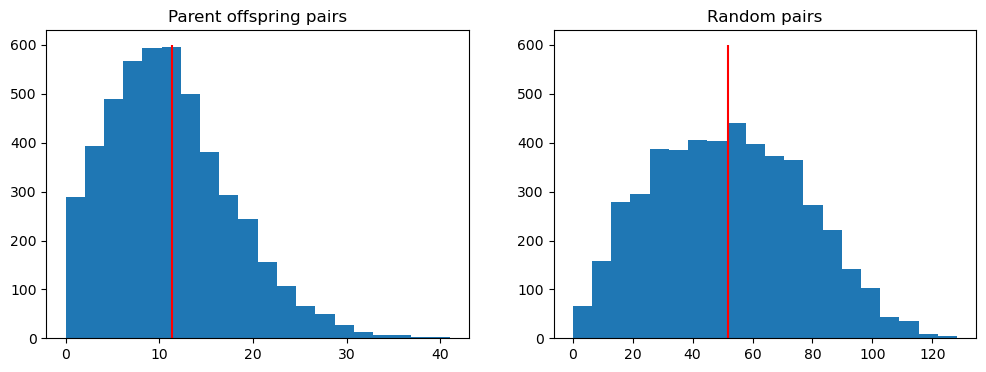

In [21]:
# Distances of parent offspring pairs are smaller than random pairs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.hist(po_distances, bins = 20)
ax1.vlines(np.mean(po_distances),0, 600, color = "red")
ax1.set_title("Parent offspring pairs")
ax2.hist(random_distances, bins = 20)
ax2.vlines(np.mean(random_distances),0, 600, color = "red")
ax2.set_title("Random pairs")